# Imports

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH = os.path.join("datasets", "housing") 
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path): 
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path) 
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing=load_housing_data()

# Frame Problem

- Predict median house value, the data will be used by the company to determine whether or not to invest in a given area or not
- supervised learning task, the data are labeled
- multiple regression
- univariate regression (predicting one outcome only)
- batch learning (no need to have a continious flow of data)

Performance Metric

$\large RMSE(X,h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h_{xi} - y_{i})^{2}}$



- where m = number of examples
- x is a vector of all of the features related to that example
- y is the true label
- X contains all of the instances and their feature values

If there were many outliers, may use 

$ \large Mean Absolute Error = \frac{1}{m} \sum_{i=1}^{m} |{h_{xi}-y_{i}|}$

Both are distance measures. RMSE is the euclidean or L2 Norm, whereas MAE is the L1 Norm

# Explore Data

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Looks like total_bedrooms has some null values that will need adjusting

In [9]:
housing['ocean_proximity'].value_counts() # ocean_proximity is a categorical variable

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

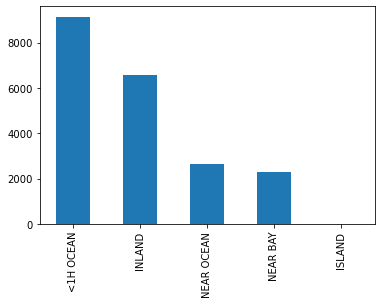

In [10]:
housing['ocean_proximity'].value_counts().plot(kind='bar')

Let's look at the numeric values

In [11]:
housing.iloc[:,:-1].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- total bedroom has missing values
- This data has metrics such as the population, median income, median hous‐ ing price, and so on for each block group in California.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

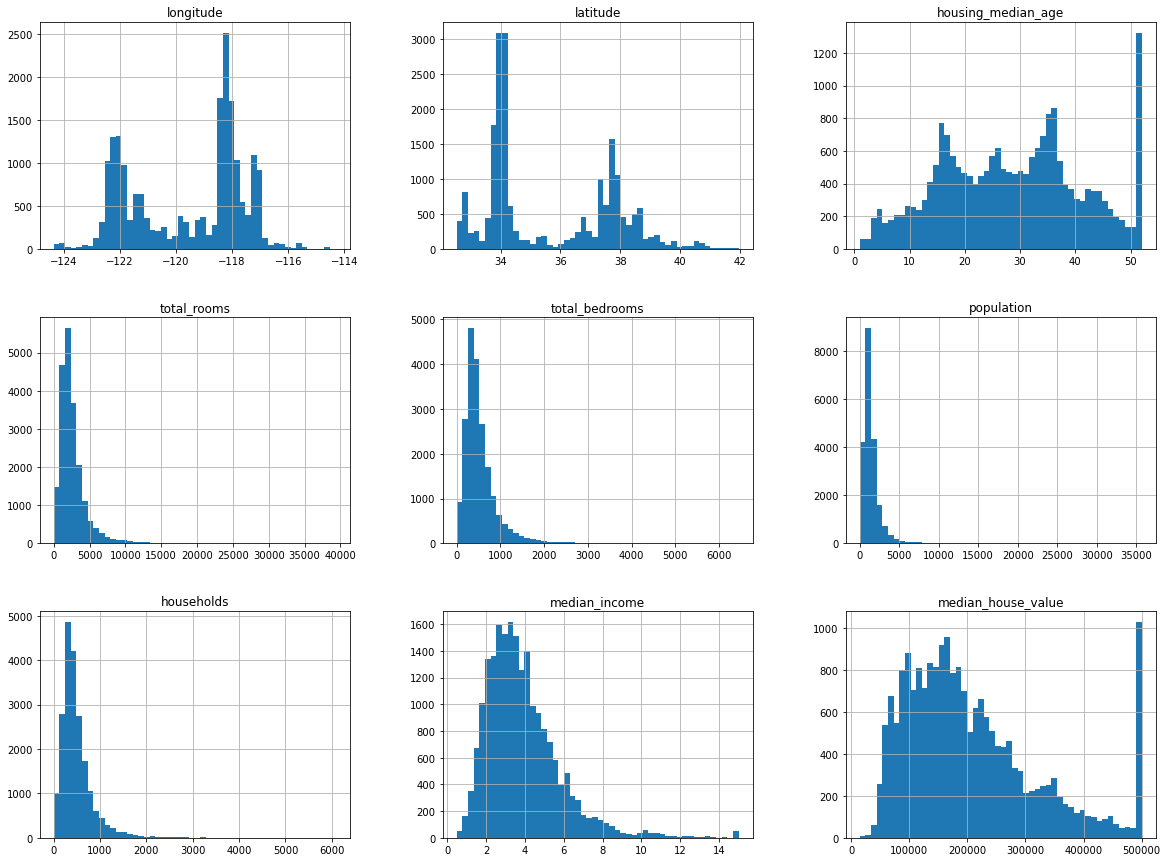

In [12]:
housing.iloc[:,:-1].hist(bins=50, figsize=(20,15))#PLOT DISTRIBUTIONS

- Median age and house value seem to have some sort of upper cut-off
- median_income is not in dollar units, it has been scaled and capped between 0.5 and 15 (multiply by 10,000)
- don't *snoop* at the data too much, might lead to biases 

# Pipeline

In [8]:
def test_train_split(data, test_ratio):
    """
    split any given data randmly into two parts, test and train, with the appropriate test_ratio
    """
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))#shuffle 
    testSize=int(len(shuffled_indices)*test_ratio)#get test size ratio
    test=shuffled_indices[0:testSize]#grab test size
    train=shuffled_indices[testSize:]#rest is train
    return data.iloc[train], data.iloc[test]
    



In [9]:
train_set, test_set= test_train_split(housing, 0.2)
np.shape(train_set)

(16512, 10)

Alternativve : sklearn methodlogy

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Stratified Sampling

Random sampling like above is *okay* for small datasets, but larger ones will lead to a sampling bias. There may not be equal representative sampling in the test and train set, creating error.

A solution is **stratified sampling** 

here the data is first divided into different homogenous groups, *strata* and then the samples are taken from there. However, this has to be done with care, the amount of strata and their size can also create a bias.

<AxesSubplot:ylabel='Frequency'>

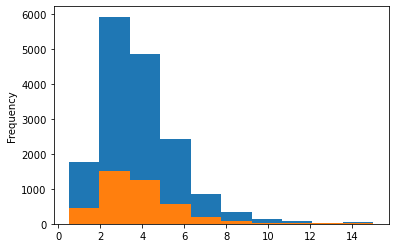

In [17]:
train_set['median_income'].plot(kind='hist')
test_set['median_income'].plot(kind='hist')

Determine which attribute is best to use for strata, here balanced median_income representation is crucial

In [18]:
#cut income into strata (quantiles)

housing['income_cat']=pd.cut(housing['median_income'],
                            bins=[0,1.5,3,4.5,6,np.inf],
                            labels=[1,2,3,4,5])

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

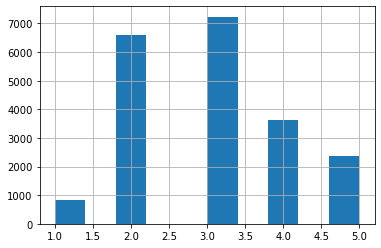

In [20]:
housing['income_cat'].hist()

The data is NOT equally distributed amongst this feature, threfore, it is important to balance sampling with the same distribution

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #an object method

In [24]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [25]:
len(test_index)/len(train_index)

0.25

check value counts to ensure equal partitioning

In [26]:
pd.DataFrame({'housing':housing['income_cat'].value_counts()/len(housing),
                'test':strat_test_set['income_cat'].value_counts()/len(strat_test_set),
                'train':strat_train_set['income_cat'].value_counts()/len(strat_train_set)})

,housing,test,train
3,0.350581,0.350533,0.350594
2,0.318847,0.318798,0.318859
4,0.176308,0.176357,0.176296
5,0.114438,0.114583,0.114402
1,0.039826,0.039729,0.039850


Checks out! the proportions are the same in each of the sets, below is without strata

In [27]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
pd.DataFrame({'housing':housing['income_cat'].value_counts()/len(housing),
                'test':test_set['income_cat'].value_counts()/len(test_set),
                'train':train_set['income_cat'].value_counts()/len(train_set)})

,housing,test,train
3,0.350581,0.358527,0.348595
2,0.318847,0.324370,0.317466
4,0.176308,0.167393,0.178537
5,0.114438,0.109496,0.115673
1,0.039826,0.040213,0.039729


removing the 'income_cat' 

In [29]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis=1, inplace=True)
#set_ is not a special notation

## Visualize

In [30]:
housingCopy=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

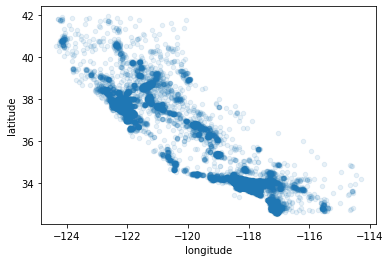

In [31]:
housingCopy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Color the plot to show population and median house value

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

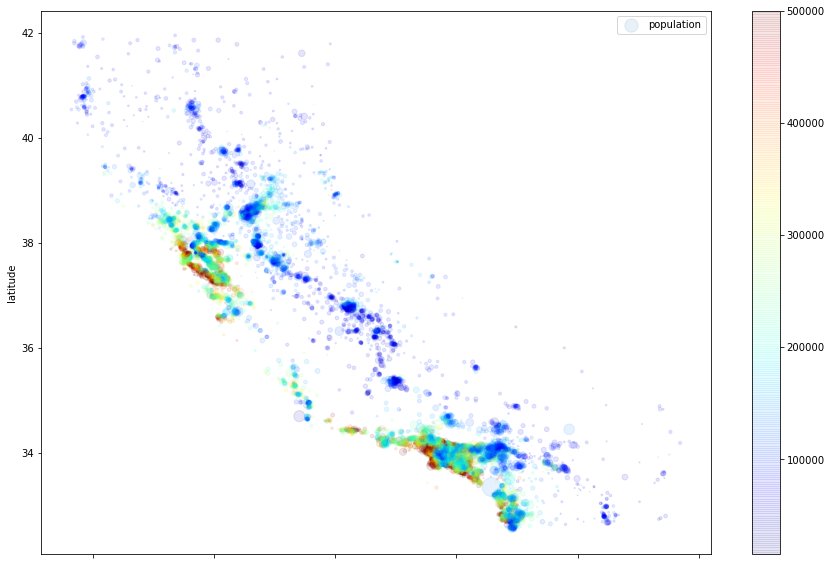

In [72]:
housingCopy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
    s=housingCopy['population']/100, label='population',#size
    c=housingCopy['median_house_value'], cmap=plt.get_cmap('jet'),colorbar=True,#color
    figsize=(15,10))


## Feature Exploration

### Cor Mat

A good place ot start is by observing linear correlations between predictors

<AxesSubplot:>

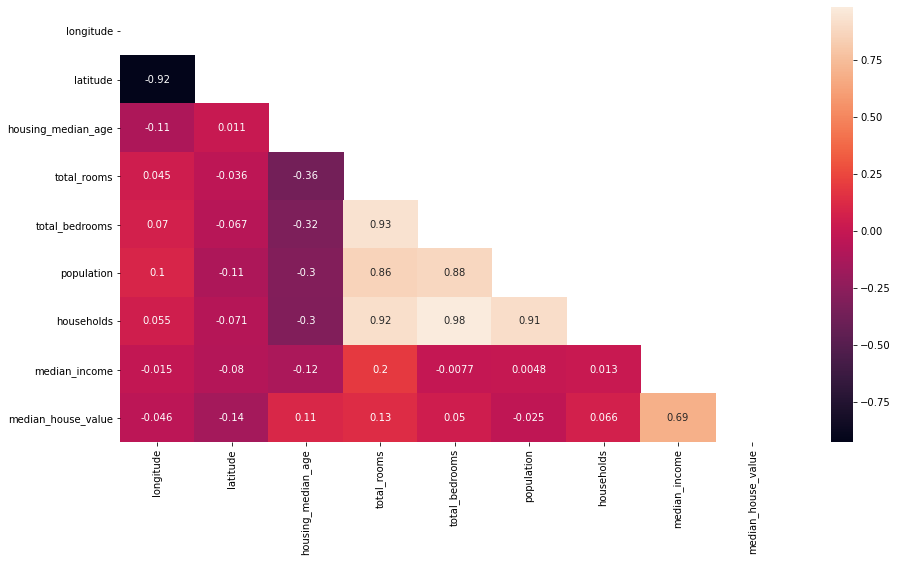

In [33]:
corrMat=housing.corr()
matrixMask = np.triu(corrMat)#let's only get bottom half
plt.figure(figsize=(15,8))
sns.heatmap(corrMat, mask=matrixMask, annot=True)


- the highest correlations are in measures of population and house size, bigger houses exist in high pop areas, and bigger houses in turn have more bedrooms
    - this information may be best condensed into a more useful combined feature
- a strong predictor is median income and median house value

In [90]:
corrMat['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Plot

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

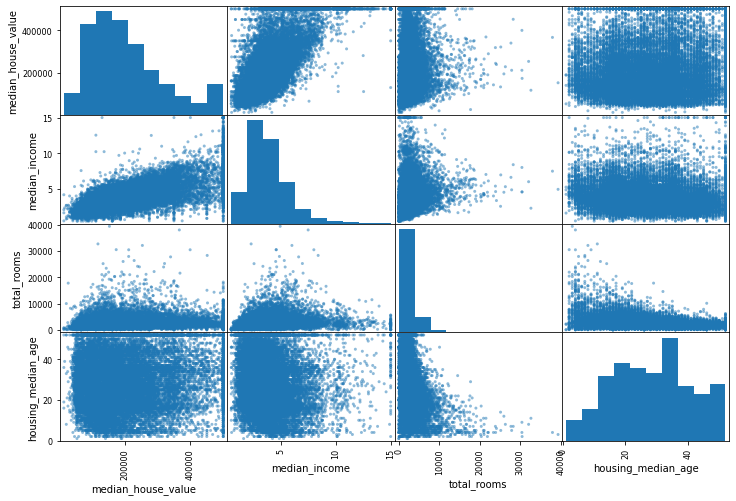

In [38]:
attributes=['median_house_value', 'median_income','total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(housing[attributes], figsize=(12,8))

- median income, total rooms both have a decent linear correlation

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

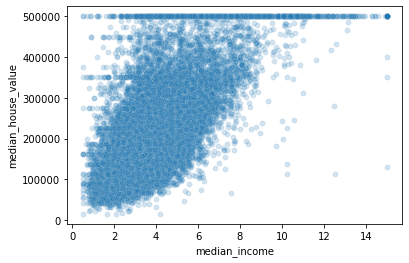

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',alpha=0.1)
sns.scatterplot(x='median_income', y='median_house_value', data=housing, alpha=0.1)

### Attribute combinations: 


on its own, # of rooms or bedrooms is not useful, need context

- num rooms per household
- num bedrooms per household
- num bedrooms from rooms
- population per household

Other strategies:
    - transform attributes with tail-heavy distributions

In [35]:
housing['roomsPERhousehold']=housing['total_rooms']/housing['households']
housing['bedroomsPERhousehold']=housing['total_bedrooms']/housing['households']
housing['bedroomsPERroom']=housing['total_bedrooms']/housing['total_rooms']
housing['popPERhousehold']=housing['population']/housing['households']

In [39]:
#add to attributes list
[attributes.append(i) for i in ['roomsPERhousehold', 'bedroomsPERhousehold', 'bedroomsPERroom', 'popPERhousehold']]

[None, None, None, None]

<AxesSubplot:>

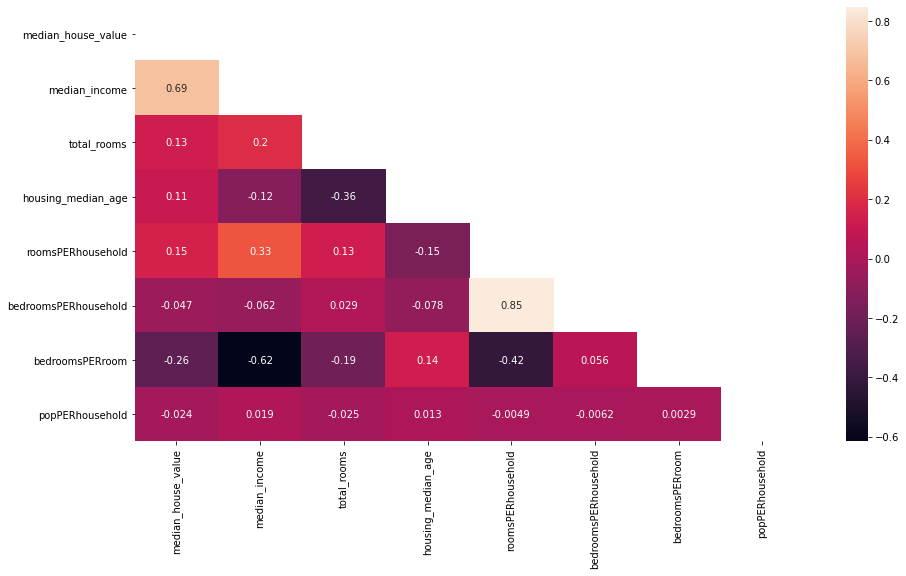

In [41]:
corrMat=housing[attributes].corr()
corrMask=np.triu(corrMat)
plt.figure(figsize=(15,8))
sns.heatmap(corrMat, mask=corrMask, annot=True)

In [115]:
attributes

['median_house_value',
 'median_income',
 'total_rooms',
 'housing_median_age',
 'roomsPERhousehold',
 'bedroomsPERhousehold',
 'bedroomsPERroom',
 'popPERhousehold']

- bedroomsPERroom is much more correlated with median house value than the regular room measures
    - surprising that *lower* bedrooms per # of rooms equals more value
        - consistent, bedrooms per household isn't correlated at all
- roomsPERhousehold is also a new informative feature

In [42]:
housing[attributes].corr()['median_house_value'].sort_values()

bedroomsPERroom        -0.255880
bedroomsPERhousehold   -0.046739
popPERhousehold        -0.023737
housing_median_age      0.105623
total_rooms             0.134153
roomsPERhousehold       0.151948
median_income           0.688075
median_house_value      1.000000
Name: median_house_value, dtype: float64

## Data Cleaning

In [43]:
# separate label and predictor
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value']

### Missing features

- delete the districts all together
- get rid of the whole attribute
- set the value to something (zero, mean, median, etc)

```python
housing.dropna(subset=["total_bedrooms"]) housing.drop("total_bedrooms", axis=1)
# option 1 # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer=SimpleImputer(strategy='median')

In [46]:
#numeric only copy
housing_num=housing.drop('ocean_proximity',axis=1)

In [47]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.

In [50]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [55]:
X=imputer.transform(housing_num)

In [58]:
housing_num=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [59]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [60]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [61]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


## Interlude : SCI-KIT Design

1. Estimators:
    - any object that can estimate some parameters based on a dataset. For example an imputer is an estimator
    - the estimation is performed by the 'fit' method
2. Transformers:
    - some estimators can also transform a dataset
    - carried out through transform()
3. Predictors:
    - some estimators can make predictions
    - predict() method
    - score() method which measures the quality of the predictions

### Data Clearning: Categorical

- Need to clean categorical data as well
    - easier to work with numbers, can convert into ordinal
    - create a binary category variable "ONE HOT ENCODING"




In [63]:
housing_cat=strat_train_set[['ocean_proximity']] #double parenthesis important later

In [65]:
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


#### Ordinal encoder

In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)#doing both steps at once


In [82]:
pd.DataFrame({'catLab':housing_cat.values.flatten()[:10],
             'numLab': housing_cat_encoded.flatten()[:10]})

,catLab,numLab
0,<1H OCEAN,0.0
1,<1H OCEAN,0.0
2,NEAR OCEAN,4.0
3,INLAND,1.0
4,<1H OCEAN,0.0
5,INLAND,1.0
6,<1H OCEAN,0.0
7,INLAND,1.0
8,<1H OCEAN,0.0
9,<1H OCEAN,0.0


these encodings are not consistent with the label's meaning, 0 and 4 are much more similar than 1 and 0

In [83]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One Hot Encoding

In [84]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
cat_encoder= OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

After onehot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero
elements. 

If there a large number of categorical variables, then OneHotEncoding will result in an explosion of variables. In this case, it may be better to transform the categories to numeric. For example, there the proximity could be some sort of measure of time.

## Custom Transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None): 
        return self # nothing else to do
    def transform(self, X): 
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] 
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        
        else: return np.c_[X, rooms_per_household, population_per_household]

        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### make a custom transformer to convert ocean_proximity to numeric

## Feature scaling

1.  min-max scaling or normalization
    - subtract min and divide by the range
    $\large \frac{x_{i} - x_{min}}{x_{max}-x_{min}}$
2.  standardization
    -take the mean and subtract from data, this makes the new mean zero
    $\large \frac{x_{i}-\bar x}{x_{sd}}$

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [90]:
num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [91]:
housing_num_tr=num_pipeline.fit_transform(housing_num)

Combine numeric and categorical transformation into one pipeline

In [95]:
from sklearn.compose import ColumnTransformer #allows to do column was transformations

In [96]:
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

In [99]:
full_pipeline=ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [100]:
housing_prepared=full_pipeline.fit_transform(housing)

# Train Model

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels, housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [111]:
print('max is', np.max(housing_labels))
print('min is ', np.min(housing_labels))

max is 500001.0
min is  14999.0


In [114]:
62628/np.mean(housing_labels)

0.3025639954682376

An RMSE of $68,628 is 30% of the mean

How to fix underfitting:

- remove regularization terms if any
- apply more complex model
- introduce new features

# Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [128]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels, housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

the model is clearly over-fitting, however, before moving to test set, let's do cross-validation to confirm

## Cross validation

In [129]:
from sklearn.model_selection import cross_val_score

In [125]:
scores=cross_val_score(tree_reg, housing_prepared, housing_labels,
                      scoring='neg_mean_squared_error', cv=10)#10 fold 
tree_rmse_scores=np.sqrt(-scores)#multiply by -1 since this is a utility rather than cost function

In [126]:
def display_scores(scores):
    print('scores' ,scores)
    print('mean', scores.mean())
    print('standard devation', scores.std())

In [130]:
display_scores(tree_rmse_scores)

scores [67669.73816437 67362.61970456 70229.34328631 68299.62160307
 71291.36213287 75577.59634532 72668.53981039 70226.23940832
 77010.86953522 69438.29976359]
mean 70977.42297540254
standard devation 3085.3445235048844


Cross validation also allows you to get a measure of the **precision** of a model through the standard deviation

In [131]:
lin_scores=cross_val_score(lin_reg, housing_prepared, housing_labels,
                      scoring='neg_mean_squared_error', cv=10)#10 fold 
lin_rmse_scores=np.sqrt(-lin_scores)#multiply by -1 since this is a utility rather than cost function

In [132]:
display_scores(lin_rmse_scores)

scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean 69052.46136345083
standard devation 2731.674001798348


# Fine Tune Model

Rather than iteratively searching for the best hyperparameters, can use gridsearch to find the best combination. This concurrently uses cross validation as well

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [137]:
param_grid = [ 
    {'n_estimators': [3, 10, 30],'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
] 

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 

In [138]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

An alterantive is Randomized search